## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-006-011-Hierarchical-clustering-04

In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import time
import warnings
import os

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(1968)

## Generate datasets. 

In [2]:
n_samples = 5000

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 1968
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

## Run the clustering and plot

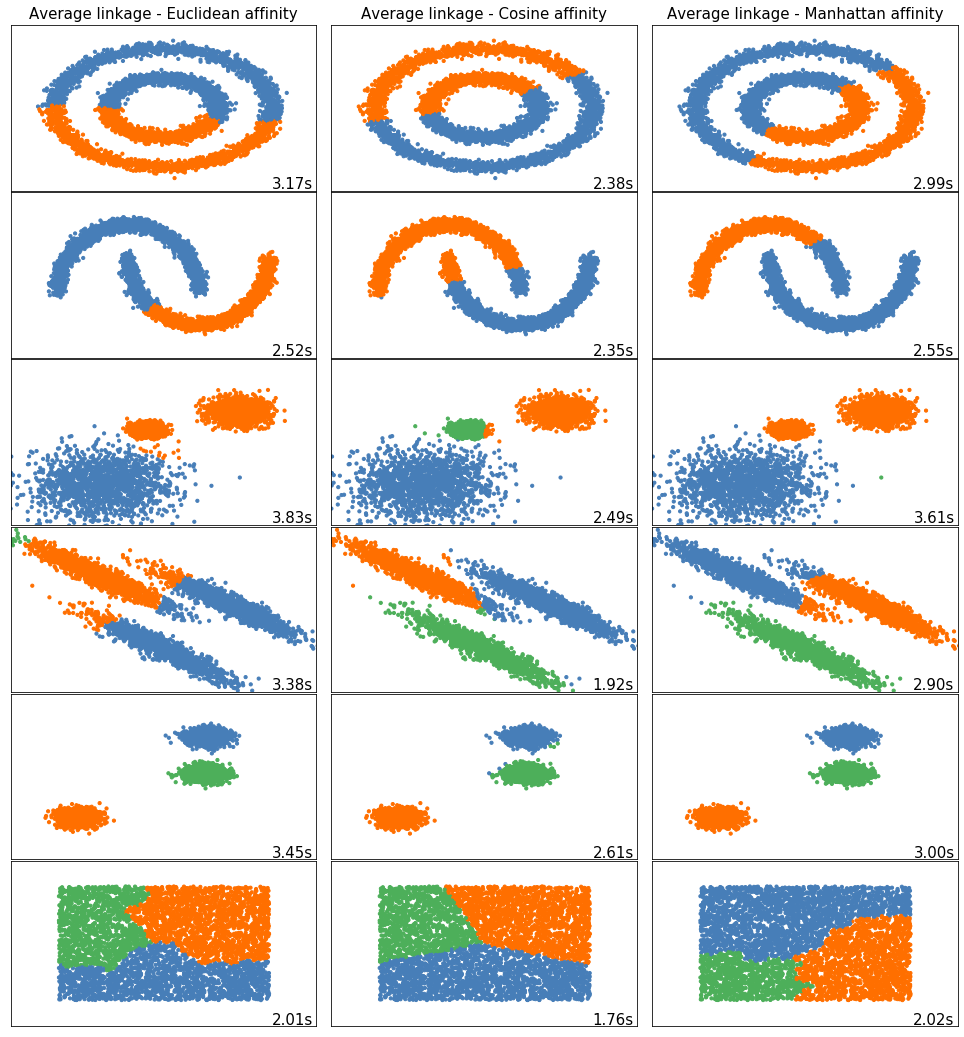

In [3]:
# Set up cluster parameters
fig1=plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    euclidean = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average', affinity = 'euclidean')
    cosine = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average', affinity = 'cosine')
    manhattan = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average', affinity = 'manhattan')

    clustering_algorithms = (
        ('Average linkage - Euclidean affinity', euclidean),
        ('Average linkage - Cosine affinity', cosine),
        ('Average linkage - Manhattan affinity', manhattan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=15)

        colors = np.array(list(islice(cycle(['#477eb8', '#ff6f00', '#4daf5a',
                                             '#f771bf', '#a75628', '#974ea3',
                                             '#998998', '#e41e1c', '#deee00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [4]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-011-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')  

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 06


## Done

In [5]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 19:59:42.500035
